### Data extraction

In [170]:
import pandas as pd

# Load the dataset from a CSV file
data = pd.read_csv('survey lung cancer.csv')

# Check the structure and contents of the dataset
print(data.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           

In [171]:
from sklearn.preprocessing import LabelEncoder

# Define the list of categorical columns with spaces trimmed
categorical_cols = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                     'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

# Remove extra spaces from the elements in the categorical_cols list
categorical_cols = [col.strip() for col in categorical_cols]

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])



# Remove extra spaces from column names
data.columns = data.columns.str.strip()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Now, your categorical columns with spaces trimmed are encoded with numerical values.


In [172]:
print(data.head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0        1        0         1                  1         1   
1                1        1        1         0                  0         0   
2                0        1        0         1                  0         1   
3                0        0        0         0                  1         0   
4                0        0        0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    1                      1    

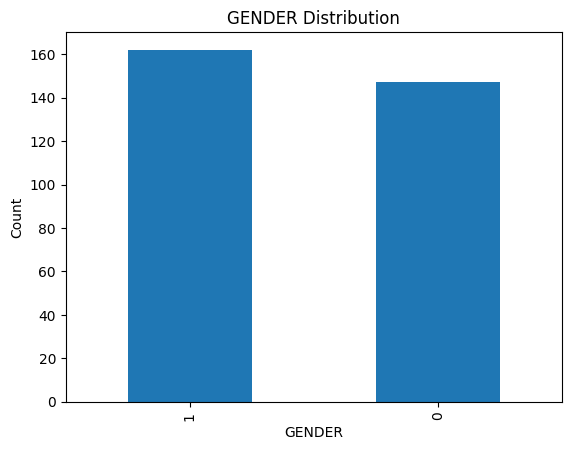

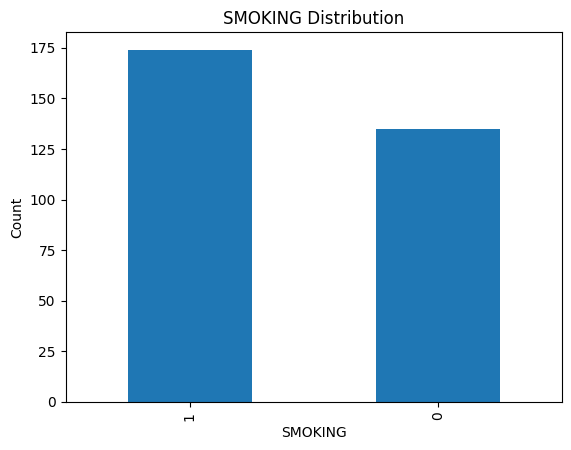

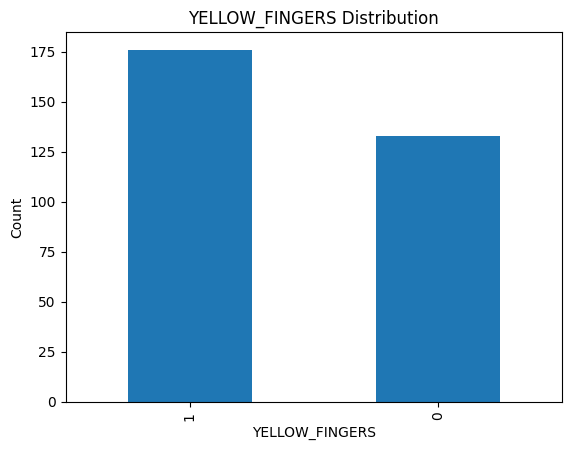

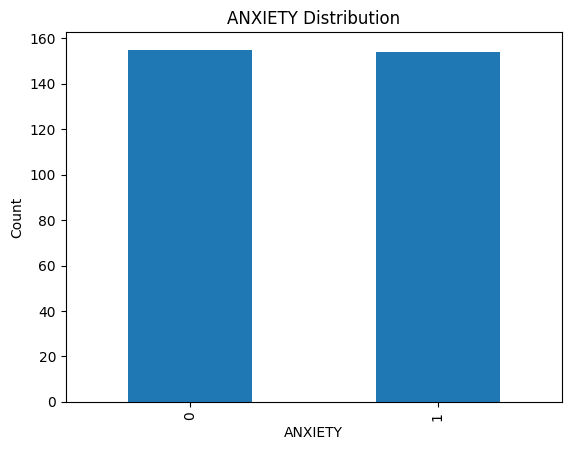

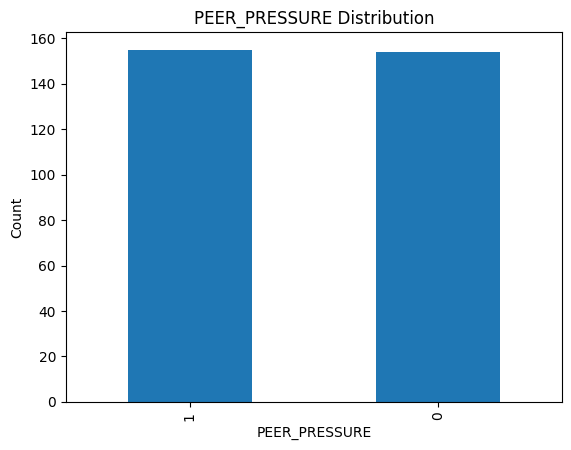

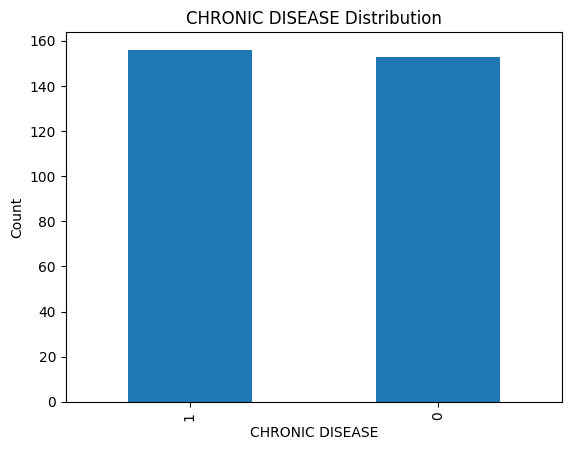

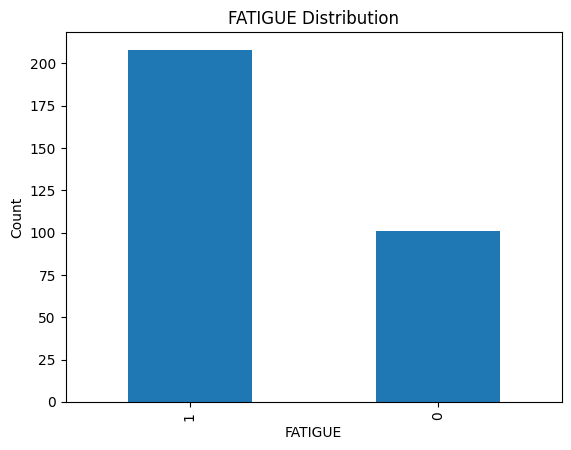

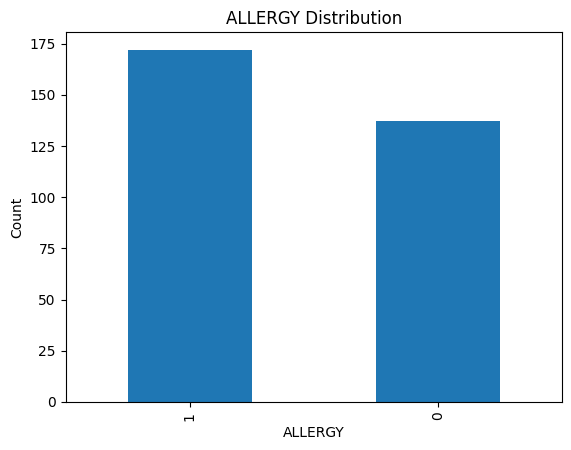

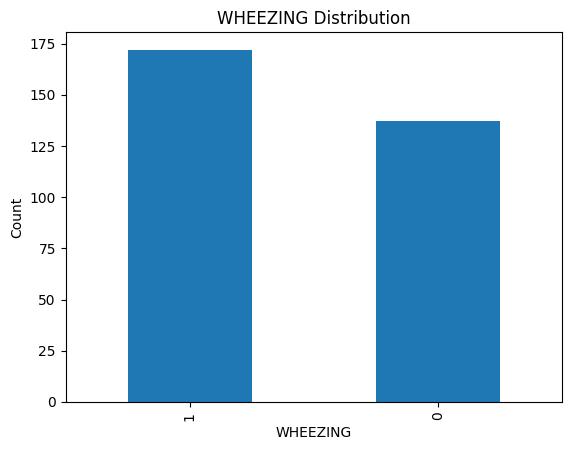

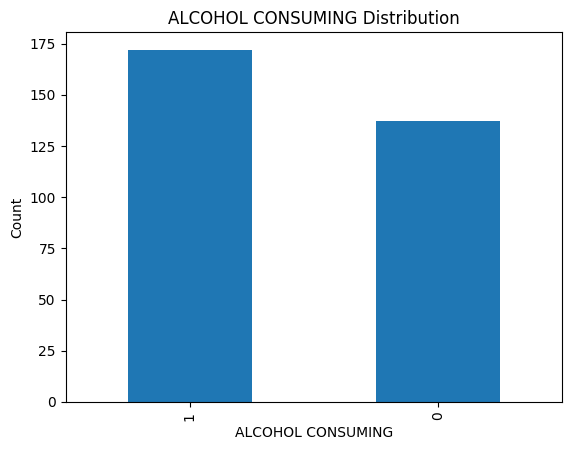

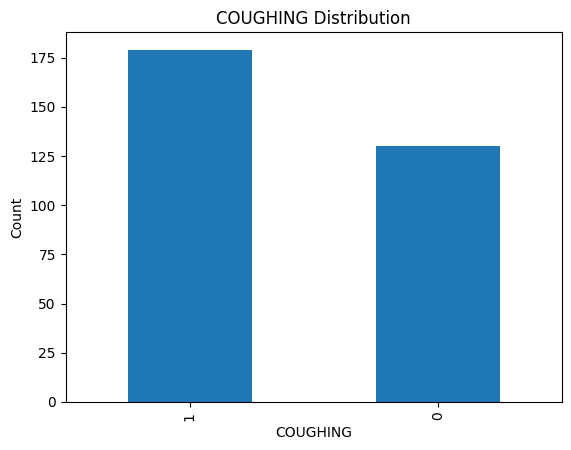

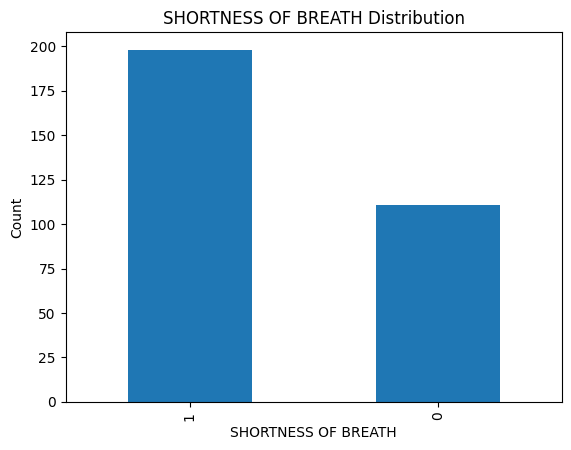

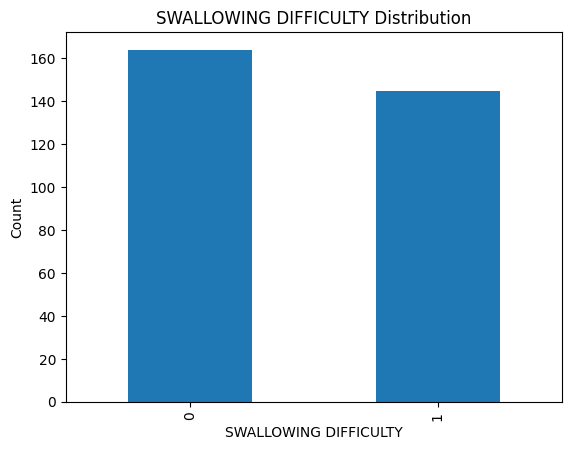

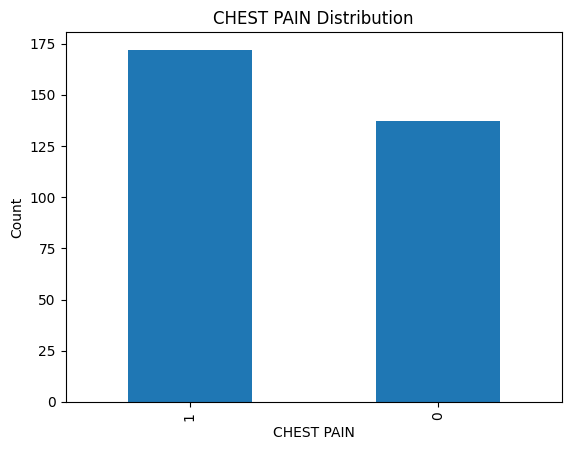

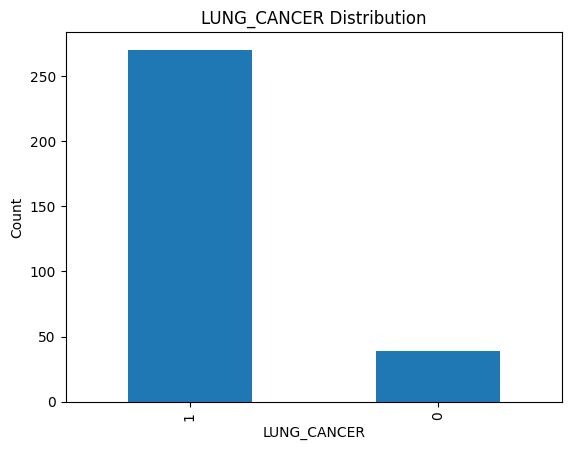

In [173]:
import matplotlib.pyplot as plt

# Plot bar plots for each categorical variable
for col in categorical_cols:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count') 
    plt.title(f'{col} Distribution')
    plt.show()

### Data preprocessing: Feature selection using Mutual Info with the DecisionTreeClassifier

In [174]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Define the target variable (in this case, 'LUNG_CANCER')
target = data['LUNG_CANCER']

# Select the features (excluding 'LUNG_CANCER')
features = data.drop(columns=['LUNG_CANCER'])

# Convert categorical features to one-hot encoding
features = pd.get_dummies(features)

# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(features, target)

# Create a DataFrame to store the features and their mutual information scores
mi_df = pd.DataFrame({'Feature': features.columns, 'Mutual_Info': mi_scores})

# Sort the features by mutual information score in descending order
mi_df = mi_df.sort_values(by='Mutual_Info', ascending=False)

# Print the feature ranking based on Mutual Information scores
print("Feature Ranking by Mutual Information Scores:")
print(mi_df)

# Split the data into features (X) and target variable (y)
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier object
dt_classifier = DecisionTreeClassifier()

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Print the feature importance based on the Decision Tree model
feature_importance = dt_classifier.feature_importances_
print("\nFeature Importance:")
for feature_name, importance in zip(X.columns, feature_importance):
    print(f"{feature_name}: {importance}")


Feature Ranking by Mutual Information Scores:
                  Feature  Mutual_Info
8                 ALLERGY     0.093585
5           PEER_PRESSURE     0.033086
13  SWALLOWING DIFFICULTY     0.030620
10      ALCOHOL CONSUMING     0.028208
2                 SMOKING     0.021235
9                WHEEZING     0.020447
11               COUGHING     0.019764
0                  GENDER     0.019741
14             CHEST PAIN     0.013190
7                 FATIGUE     0.012600
6         CHRONIC DISEASE     0.011078
4                 ANXIETY     0.008998
1                     AGE     0.008444
3          YELLOW_FINGERS     0.000000
12    SHORTNESS OF BREATH     0.000000

Feature Importance:
GENDER: 0.0
AGE: 0.33506899367598497
SMOKING: 0.012585335281993912
YELLOW_FINGERS: 0.04688742711739278
ANXIETY: 0.033599349276456456
PEER_PRESSURE: 0.022550704539874594
CHRONIC DISEASE: 0.039000555668312134
FATIGUE: 0.049961249536556646
ALLERGY: 0.11471316498708946
WHEEZING: 0.02691863379759803
ALCOHOL CONSU

### Feature Selection

In [175]:
# Select the top features based on a threshold (e.g., top 90% of features)
threshold = 0.9  # You can adjust this threshold as needed

# Find the number of features that meet the threshold
num_features_to_keep = int(threshold * len(features.columns))

# Get the names of the selected features
selected_features = mi_df.head(num_features_to_keep)['Feature'].tolist()

# Get the names of the selected features including one-hot encoded columns
selected_features = [col for col in selected_features if col in X.columns]

# Create a new dataset with the selected features
X_selected = X[selected_features]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size=0.2, random_state=42)

# Print the selected features
# Create a DataFrame with selected features

selected_features_df = X[selected_features]

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for feature in selected_features:
    selected_features_df[feature] = label_encoder.fit_transform(selected_features_df[feature])


# Display the DataFrame with selected features as columns
print("Selected Features as Columns:")
print(selected_features_df.head())




Selected Features as Columns:
   ALLERGY  PEER_PRESSURE  SWALLOWING DIFFICULTY  ALCOHOL CONSUMING  SMOKING  \
0        0              0                      1                  1        0   
1        1              0                      1                  0        1   
2        0              1                      0                  0        0   
3        0              0                      1                  1        1   
4        0              0                      0                  0        0   

   WHEEZING  COUGHING  GENDER  CHEST PAIN  FATIGUE  CHRONIC DISEASE  ANXIETY  \
0         1         1       1           1        1                0        1   
1         0         0       1           1        1                1        0   
2         1         1       0           1        1                0        0   
3         0         0       1           1        0                0        1   
4         1         1       0           0        0                0        0   

   AGE  

C:\Users\Admin\AppData\Local\Temp\ipykernel_11380\144370230.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df[feature] = label_encoder.fit_transform(selected_features_df[feature])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11380\144370230.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df[feature] = label_encoder.fit_transform(selected_features_df[feature])
C:\Users\Admin\AppData\Local\Temp\ipykernel_11380\144370230.py:30: SettingWithCopyWarning: 
A value is t

### Building TAN Bayesian Network

It appears that you have successfully trained and evaluated your TAN Bayesian Network model. The code you provided loads the dataset, preprocesses the data, builds the TAN model, performs inference, and evaluates the model's performance. Here's a summary of what you've done so far:

1. Loaded and preprocessed the dataset, encoding categorical features.
2. Split the data into training and testing sets.
3. Trained a Decision Tree Classifier to obtain feature importance.
4. Learned the structure of the TAN Bayesian Network using HillClimbSearch with BIC scoring.
5. Learned the parameters for the network using Maximum Likelihood Estimation.
6. Performed inference and made predictions for the test data.
7. Calculated and displayed evaluation metrics, including accuracy, precision, recall, F1-score, classification report, and confusion matrix.

Now, if you want to take the next steps in your project or analysis, you might consider the following:

1. **Feature Selection**: Based on the feature importance obtained from the Decision Tree Classifier, you can further analyze and refine your feature set, potentially removing less important features to simplify the model.

2. **Hyperparameter Tuning**: Experiment with different hyperparameters for the Decision Tree Classifier, such as tree depth or minimum samples per leaf, to optimize the model's performance.

3. **Cross-Validation**: Instead of a single train-test split, consider using cross-validation to get a more robust estimate of your model's performance.

4. **Handling Class Imbalance**: If your dataset has class imbalance, consider using techniques like oversampling, undersampling, or using different evaluation metrics to address this issue.

5. **Additional Model Evaluation**: Continue to evaluate and fine-tune your model. You might also want to explore other Bayesian network structures and algorithms to see if they provide better results.

6. **Use in a Real Application**: If this model is intended for a real application, you would need to deploy it and integrate it into your application or decision support system.

Remember to adapt the next steps based on your specific project goals and requirements.

In [182]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

# Define the network structure
model = BayesianNetwork()
model.add_nodes_from(data.keys())


# Define the CPD for each node that is present in the dataset
nodes_to_estimate = ['ALLERGY','SWALLOWING DIFFICULTY', 'CHEST PAIN','ALCOHOL CONSUMING','ANXIETY', 'GENDER','CHRONIC DISEASE',
                     'FATIGUE','COUGHING','SHORTNESS OF BREATH','YELLOW_FINGERS','PEER_PRESSURE','SMOKING','AGE','WHEEZING' , 'LUNG_CANCER']
for node in nodes_to_estimate:
    if node in data.columns:
        cpd_node = BayesianEstimator(model, data).estimate_cpd(node)
        model.add_cpds(cpd_node)
    # if 'LUNG_CANCER' in data.columns:
    #     # You need to estimate the CPD for 'LUNG_CANCER' based on other relevant nodes (e.g., 'SMOKING' and 'AGE').
    #     # Replace the following line with the actual estimation of CPD based on your data and domain knowledge.
    #     cpd_lung_cancer = BayesianEstimator(model, data).estimate_cpd('LUNG_CANCER', prior_type='BDeu', equivalent_sample_size=10)

    #     # Add the CPD for 'LUNG_CANCER' to the model
    #     model.add_cpds(cpd_lung_cancer)
    else:
        print(f"The '{node}' node is not present in the dataset.")
    

# You need to repeat this process for all other nodes in your network.
# After defining all CPDs for the available nodes, you can check if your model is valid.
try:
    assert model.check_model()
except ValueError as e:
    print(e)


## Performing inference

In [193]:
from pgmpy.inference import VariableElimination

# Create an inference object
inference = VariableElimination(model)

# Query the network to calculate conditional probabilities
result = inference.query(variables=['LUNG_CANCER'], evidence={'SMOKING': 0, 'AGE': 59, 'YELLOW_FINGERS': 0, 'ANXIETY': 0, 'PEER_PRESSURE': 1, 'CHRONIC DISEASE': 0, 
                                                              'FATIGUE': 1, 'ALLERGY': 0, 'WHEEZING': 1, 'ALCOHOL CONSUMING': 0, 
                                                              'COUGHING': 1, 'SHORTNESS OF BREATH': 1, 'SWALLOWING DIFFICULTY': 0, 'CHEST PAIN': 1})
print(result)


+----------------+--------------------+
| LUNG_CANCER    |   phi(LUNG_CANCER) |
+================+====================+
| LUNG_CANCER(0) |             0.1322 |
+----------------+--------------------+
| LUNG_CANCER(1) |             0.8678 |
+----------------+--------------------+


## Prediction

In [207]:
# Create an inference object
inference = VariableElimination(model)

# Define the evidence
evidence = {
    'AGE': 46,
    'SMOKING': 1,
    'YELLOW_FINGERS': 0,
    'ANXIETY': 0,
    'PEER_PRESSURE': 1,
    'CHRONIC DISEASE': 1,
    'FATIGUE': 1,
    'ALLERGY': 1,
    'WHEEZING': 1,
    'ALCOHOL CONSUMING': 1,
    'COUGHING': 1,
    'SHORTNESS OF BREATH': 1,
    'SWALLOWING DIFFICULTY': 0,
    'CHEST PAIN': 0
}

# Query the network to calculate conditional probabilities
result = inference.query(variables=['LUNG_CANCER'], evidence=evidence)

# Print the result
print(result)


+----------------+--------------------+
| LUNG_CANCER    |   phi(LUNG_CANCER) |
+================+====================+
| LUNG_CANCER(0) |             0.1322 |
+----------------+--------------------+
| LUNG_CANCER(1) |             0.8678 |
+----------------+--------------------+


In [208]:
# Get the probability of LUNG_CANCER(1) from the result
lung_cancer_probability = result.values[1]

# Make a prediction based on the probability
if lung_cancer_probability >= 0.5:
    prediction = "LIKELY"
else:
    prediction = "UNLIKELY"

# Provide a recommendation based on the prediction
if prediction == "LIKELY":
    recommendation = "Given the patient's characteristics and the high probability of lung cancer, it is recommended to schedule further diagnostic tests and consult with a healthcare professional as soon as possible."
else:
    recommendation = "Based on the available information, the patient is unlikely to have lung cancer. However, it is still advisable to monitor their health and consider regular check-ups."

# Print the prediction and recommendation
print("Prediction: The patient is", prediction, "to have lung cancer.")
print("Recommendation:", recommendation)


Prediction: The patient is LIKELY to have lung cancer.
Recommendation: Given the patient's characteristics and the high probability of lung cancer, it is recommended to schedule further diagnostic tests and consult with a healthcare professional as soon as possible.


### Model evaluation

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier object (you can replace this with your Bayesian Network model)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Evaluation:
Accuracy: 0.95
Precision: 0.98
Recall: 0.97
F1-Score: 0.97


## Sensitivity analysis

In [221]:
from pgmpy.factors.discrete import TabularCPD

# Create a copy of the original model
sensitivity_model = model.copy()

# Perturb the CPD for "SMOKING"
# Here, we'll increase the probability of smoking (node 1) and decrease the probability of not smoking (node 0)
AC_cpd = TabularCPD(variable='ALCOHOL CONSUMING', variable_card=2, values=[[0.2], [0.8]])
sensitivity_model.add_cpds(AC_cpd)

# Create an inference object for the sensitivity model
sensitivity_inference = VariableElimination(sensitivity_model)

# Query the network with the same evidence as before
result_sensitivity = sensitivity_inference.query(variables=['LUNG_CANCER'], evidence=evidence)

# Print the results
print("Sensitivity Analysis:")
print("Original Prediction:")
print(result)
print("\nSensitivity Model Prediction:")
print(result_sensitivity)


Sensitivity Analysis:
Original Prediction:
+----------------+--------------------+
| LUNG_CANCER    |   phi(LUNG_CANCER) |
+================+====================+
| LUNG_CANCER(0) |             0.1322 |
+----------------+--------------------+
| LUNG_CANCER(1) |             0.8678 |
+----------------+--------------------+

Sensitivity Model Prediction:
+----------------+--------------------+
| LUNG_CANCER    |   phi(LUNG_CANCER) |
+================+====================+
| LUNG_CANCER(0) |             0.1322 |
+----------------+--------------------+
| LUNG_CANCER(1) |             0.8678 |
+----------------+--------------------+


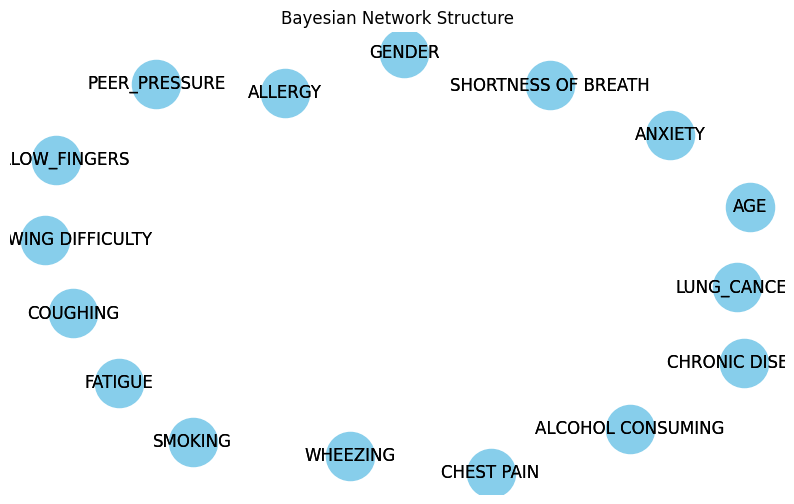

In [252]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork

# Assuming you have your Bayesian Network model (best_model) ready
best_model = model  # Replace with your best model

# Create a Matplotlib figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Create a NetworkX graph from the Bayesian Network
nx_model = nx.DiGraph()

# Add nodes to the graph
nx_model.add_nodes_from(best_model.nodes())

# Add edges to the graph
nx_model.add_edges_from(best_model.edges())

# Define positions for the nodes (you can adjust the positions as needed)
pos = nx.spring_layout(nx_model, seed=42)

# Draw nodes, edges, and labels
nx.draw(nx_model, pos, with_labels=True, node_size=1200, node_color="skyblue", arrowsize=20)
labels = {node: node for node in best_model.nodes()}
nx.draw_networkx_labels(nx_model, pos, labels, font_size=12)

# Show the plot
plt.title("Bayesian Network Structure")
plt.show()

# You can then add CPDs to the learned structure and proceed with inference and other tasks as needed.


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 27/1000000 [00:01<17:47:34, 15.61it/s]


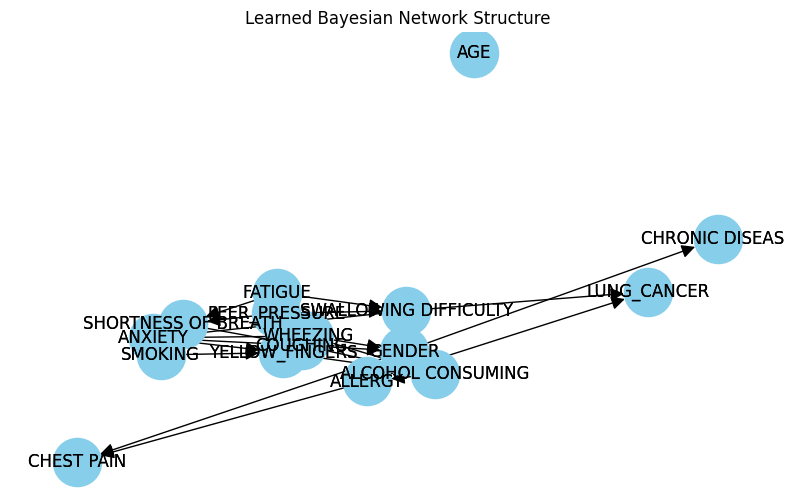

In [250]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator, HillClimbSearch, BicScore

# Assuming you have your Bayesian Network model (best_model) ready
best_model = model  # Replace with your best model

# Define the structure learning algorithm (Hill Climbing) and the scoring metric (BIC)
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))

# Create a Matplotlib figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Create a NetworkX graph from the Bayesian Network
nx_model = nx.DiGraph()

# Add nodes to the graph
nx_model.add_nodes_from(best_model.nodes())

# Add edges to the graph
nx_model.add_edges_from(best_model.edges())

# Define positions for the nodes (you can adjust the positions as needed)
pos = nx.spring_layout(nx_model, seed=42)

# Draw nodes, edges, and labels
nx.draw(nx_model, pos, with_labels=True, node_size=1200, node_color="skyblue", arrowsize=20)
labels = {node: node for node in best_model.nodes()}
nx.draw_networkx_labels(nx_model, pos, labels, font_size=12)

# Show the plot
plt.title("Learned Bayesian Network Structure")
plt.show()

# You can then add CPDs to the learned structure and proceed with inference and other tasks as needed.


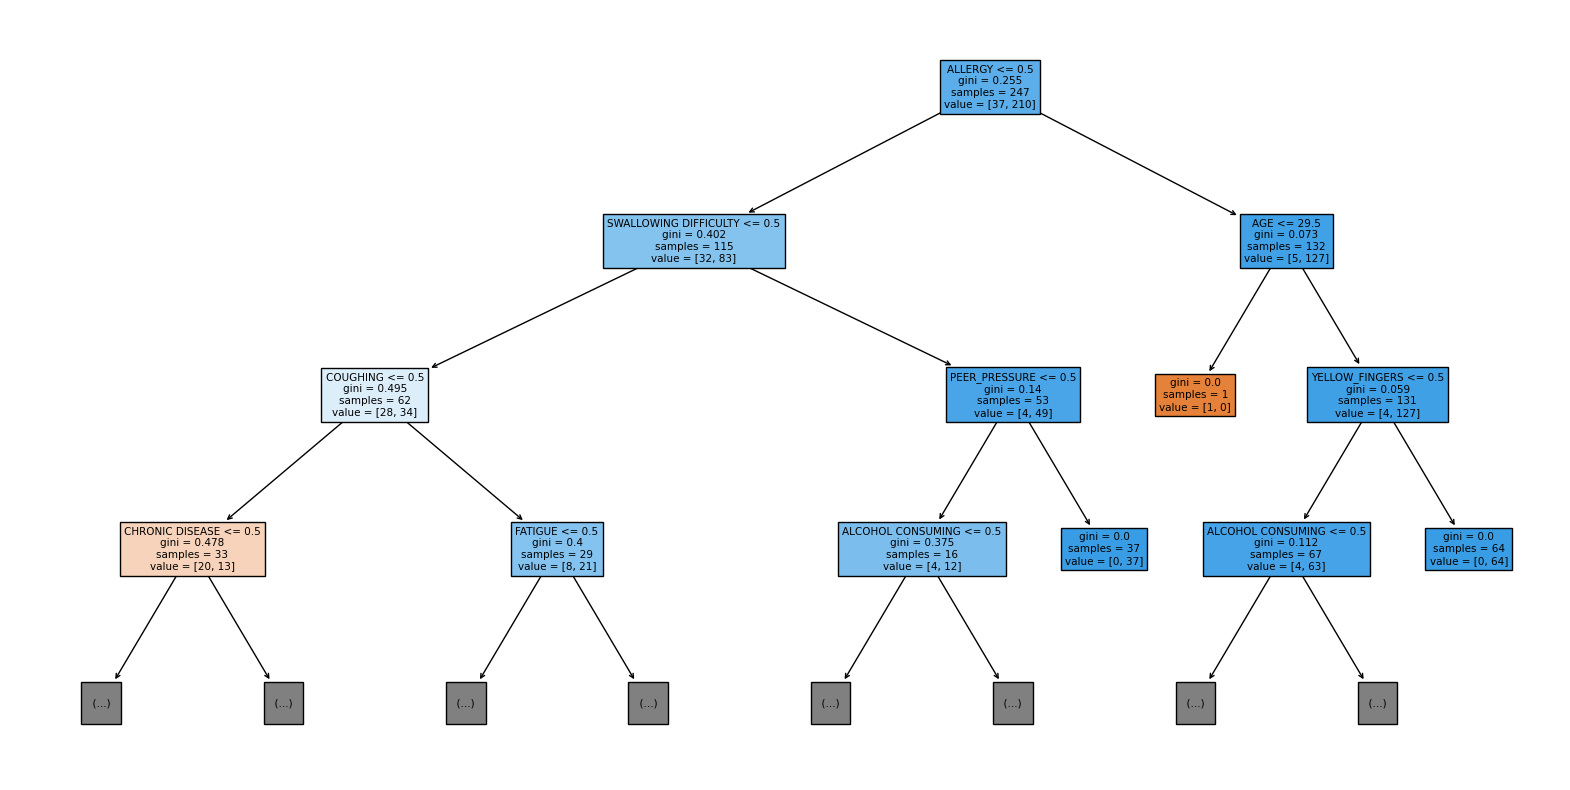

In [236]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Điều chỉnh kích thước của biểu đồ
plot_tree(dt_classifier, filled=True, feature_names=X.columns, max_depth=3)  # Giới hạn chiều sâu ở đây
plt.show()

# Cross-Validation

In [286]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Perform k-fold cross-validation (e.g., 5-fold cross-validation)
k = 270  # You can adjust the number of folds (k) as needed
scores = cross_val_score(dt_classifier, X_selected, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_deviation = scores.std()

# Display the mean and standard deviation
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_deviation)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 39 members, which is less than n_splits=270.
  warnings.warn(


Cross-Validation Scores: [0.5 0.5 1.  1.  1.  0.5 0.5 1.  0.5 0.5 1.  0.5 0.5 0.5 1.  0.5 1.  1.
 1.  0.5 0.5 0.5 0.5 0.  1.  0.5 1.  1.  1.  0.5 0.5 0.5 0.5 0.5 1.  0.5
 0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1

### Evidence nodes check

In [287]:

# Check if evidence nodes are present in the Bayesian Network
evidence_nodes = ['SWALLOWING DIFFICULTY', 'ALLERGY', 'ALCOHOL CONSUMING', 'COUGHING', 'FATIGUE']

missing_evidence_nodes = [node for node in evidence_nodes if node not in model.nodes()]

if missing_evidence_nodes:
    print("The following evidence nodes are missing in the Bayesian Network:")
    for node in missing_evidence_nodes:
        print(node)
else:
    print("All evidence nodes are present in the Bayesian Network.")

All evidence nodes are present in the Bayesian Network.


### Re-Evaluate the model

In [288]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into features (X) and target variable (y)
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier object
dt_classifier = DecisionTreeClassifier()

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)


# Convert X_test to a list of dictionaries
evidence_list = X_test.to_dict(orient='records')

# Perform inference and make predictions on the test data
inference = VariableElimination(model)
result = []
for evidence in evidence_list:
    query_result = inference.map_query(variables=['LUNG_CANCER'], evidence=evidence)['LUNG_CANCER']
    result.append(query_result)

# Display the inference result
print("Inference Result:")
print(result)

# Evaluate the model on the test data
y_pred = result  # The predicted values from the Bayesian Network

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(conf_matrix)


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

Inference Result:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy: 0.967741935483871
Precision: 0.967741935483871
Recall: 1.0
F1 Score: 0.9836065573770492

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62


Confusion Matrix:
[[ 0  2]
 [ 0 60]]



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:147

## Custom Decision Tree Classifier

In this code section, a custom Decision Tree Classifier is created and trained with specific hyperparameters. The following steps are performed:

1. **Custom Classifier Creation:** A Decision Tree Classifier is instantiated with the following custom hyperparameters:
   - `max_depth` set to 5
   - `min_samples_split` set to 2
   - `min_samples_leaf` set to 1
   - `random_state` set to 42 for reproducibility.

2. **Model Training:** The custom classifier is trained using the training data, `X_train` and `y_train`.

3. **Prediction:** The model is used to make predictions on the test data, resulting in the `y_pred` variable.

4. **Model Evaluation:** The accuracy of the model's predictions is calculated using the `accuracy_score` function, and a detailed classification report is generated using `classification_report`. The results are then displayed.

This code snippet demonstrates how to customize a Decision Tree Classifier's hyperparameters and assess its performance on a test dataset.



In [289]:
from sklearn.metrics import accuracy_score, classification_report

# Tạo một Decision Tree Classifier với các siêu tham số tùy chỉnh
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Đào tạo mô hình với các tham số mới
dt_classifier.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt_classifier.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9354838709677419
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



In [291]:
# Sử dụng mô hình để dự đoán trên tập dữ liệu huấn luyện và tập dữ liệu kiểm tra
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Tính độ chính xác trên tập dữ liệu huấn luyện và tập dữ liệu kiểm tra
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on training data: {train_accuracy}")
print(f"Accuracy on testing data: {test_accuracy}")


Accuracy on training data: 0.9311740890688259
Accuracy on testing data: 0.9354838709677419
